# Gradient Based Optimization

## How it Works:
We start with a Two Line Element (TLE) at a given time, which we call TLE$_{0}$, and we want to use it to predict the actual position of a satellite at some future observation time ($t_{obs}$).

We can use the SGP4 algorithm to propagate the state from $t_0 \rightarrow t_{obs}$, and obtain the state at $t_{obs}$. We define the state (i.e., position and velocity) of an object in 3D space, as (this is described in more detail below):

\begin{equation}
\vec{x}(t)=[x(t), y(t), z(t), \dot{x}(t), \dot{y}(t), \dot{z}(t)]^T
\end{equation}

where:

- **$\vec{x}(t)$:** This is the state vector of the object at time $t$. The vector encapsulates all the necessary information to describe the object's state in space at some specific moment. In our case, the object is a TLE.
- **$[ \cdot ]$:** Indicates this is a vector
- **$x(t), y(t), z(t)$:** These are the positional coordinates of the object at time $t$. They represent the location of the object in a three-dimensional space
- **$\dot{x}(t), \dot{y}(t), \dot{z}(t)$:** These terms represent the velocities of the object in the direction of each corresponding axis (X, Y, and Z). The dot above each symbol signifies these are first derivatives of the position coordinates. $\dot{x}(t)$ is the velocity in the X direction, $\dot{y}(t)$ is the velocity in the Y direction, and $\dot{z}(t)$ is the velocity in the Z direction.

We then have: TLE$_0$, $\vec{x}(t_0)$, and $\vec{x}(t_{obs})$, but we want to find TLE$_{obs}$. Said with an example: Imagine we have some satellite with TLE$_0$. For TLE$_0$ we have all the orbital parameters required to define the satellite's orbit at $t_0$; inclination, right ascension of the ascending node, eccentricity, etc. Now we use TLE$_0$ as input to an orbital propagation model (SGP4) to compute the satellite's state vector at time 0 ($t_0$). This calculation gives us $\vec{x}(t_0)$ which is the satellite's position and velocity in space. Now fast-forward a bit into the future to a new time ($t_{obs}$) where we again observe the satellite's actual position and velocity ($\vec{x}(t_{obs})$). The problem is that our initial estimate $\vec{x}(t_0) \neq \vec{x}(t_{obs})$. Our estimate was wrong. What we now want to do is to calculate TLE${_{obs}}$. TLE${_{obs}}$ is the TLE set that when applied at our new observation time **would** give us $\vec{x}(t_{obs})$. Said another way, we want to be able to invert from state to an accurate TLE that correctly produces TLE$_{obs}$.

This is where gradient descent comes into play. If you have no prior experience with gradient descent this is very likely going to be confusing. You can read more about it [here](https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/optimizing-multivariable-functions/a/what-is-gradient-descent). The very high level description is that gradient descent is an optimization algorithm used to minimize a function by iteratively moving in the direction of the steepest decrease, as defined by the negative of the gradient. We use it in machine learning to iteratively refine model parameters, aiming to find the set of parameters that minimizes the cost function, typically representing the discrepancy between predicted and observed data. 

So how does gradient descent apply here? We can reformulate our problem, that is, how do we take $\vec{x}(t_0)$ (that's the estimation made by SGP4) and get it so that it is as close as we can to $\vec{x}(t_{obs})$ (the actual position of an object at time $t_{obs}$). This is where gradient descent comes in. We create a cost function:

\begin{equation}
F(\vec{y}) = \left| \text{SGP4}\left(\text{TLE}(\vec{y}), t_{\text{obs}}\right) - \vec{x}(t_{\text{obs}}) \right|
\end{equation}

1. **SGP4(TLE($ \vec{y} $), $ t_{obs} $)**: The satellite state predicted at the observation time $ t_{obs} $ by the SGP4 model, using the TLE parameters adjusted by the vector $ \vec{y} $.
2. **$ \vec{x}(t_{obs}) $**: The actual observed satellite state at the observation time $ t_{obs} $.

Our goal with this equation is to make $F(\vec{y})$ as small as possible, that is, we want to minimize the function. Before I explain why, let me explain what $\vec{y}$ is. $\vec{y}$ is a series of parameters that are going to modify the output of our SGP4 algorithm. The way we're going to do this is through gradient descent. Imagine it like this: SGP4 includes all sorts of things eccentricity, drag coefficient, solar radiation pressure, lunar perturbations, and a whole bunch of other stuff but at the very end it is still wrong by a little bit. So you can think of what we're doing here is adding a parameter in front of all this stuff (it doesn't work exactly like this, but this is the intuition) and then we're going to use gradient descent to figure out which combination of parameters modifies SGP4 from guessing incorrectly, to guessing correctly across a broad dataset. Those are our $\vec{y}$. Our minimization function's goal is to figure out which $\vec{y}$ most reduces the difference between $\text{SGP4}\left(\text{TLE}(\vec{y}), t_{\text{obs}}\right)$ and $\vec{x}(t_{\text{obs}})$. Expressed mathematically:

\begin{align}
\textrm{given}: & \ \textrm{TLE}_0, \vec{x}_0\\
\textrm{find}: & \ \vec{y}\\
\textrm{that minimize}: & F(\vec{y})=|SGP4(\textrm{TLE}(\vec{y}),t_{obs})-\vec{x}(t_{obs})| =|\vec{\tilde{x}}(t_{obs})-\vec{x}(t_{obs})|
\end{align}

We can do this via [Newton's Method](https://math.libretexts.org/Bookshelves/Calculus/Calculus_(OpenStax)/04%3A_Applications_of_Derivatives/4.09%3A_Newtons_Method). We do not explain Newton's Method here, however the intuition and what is important here is that it provides a method to take some initial parameter estimation $y_{0}$ and minimize it such that the parameter $y$ modifies function $\vec{x}$ to more closely approximate $\vec{x}(t_{obs})$. When we run gradient descent, you can imagine this visually as us trying to find the bottom of a parabola as that is when some function is at its lowest value. Recall, that's what we're trying to do here, find the lowest possible value of a function, where the function is minimizing the difference between where we guess a satellite is and where it really is. Smaller values means our guess is more accurate. This is what it looks like:

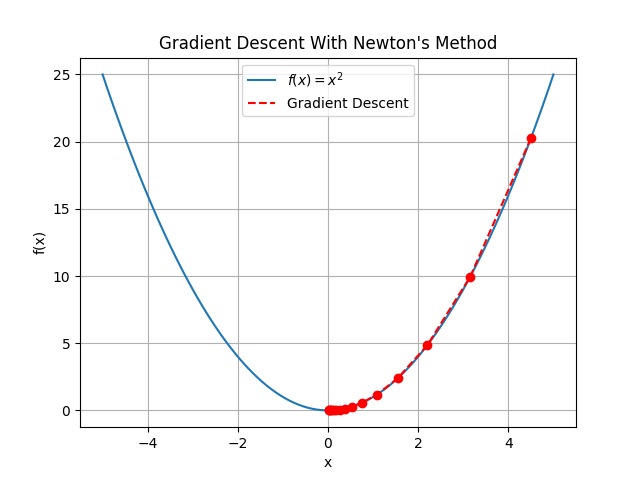

This picture also illustrates Newton's Method graphically. We start with some guess and we follow tangent lines until we find where $f(x)=0$. Here is what Newton's Method looks like expressed mathematically:

\begin{equation}
y_{k+1}=y_{k}-DF^{-1}(y_k)F(y_k)
\end{equation}

with $DF$ the [Jacobian](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/jacobian/v/the-jacobian-matrix) of $F$ with respect to $y_k$. Conceptually, this is a bit heady if you haven't seen it before. To wrap your head around this, you will need a good understanding of [partial derivatives](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivatives/v/partial-derivatives-introduction), but I will explain the intuition. A partial derivative gives us information about how the value of a function changes if we hold constant all variables except one. That is to say, if we want to go "down" it tells us which direction has a steeper downward gradient. This is relevant to gradient descent because we want to find the point at which the function is lowest and while this is simple when the graph is 2D, this becomes harder when the graph is 3D, and much hard when the graph is many dimensions AKA N-dimensional. The Jacobian packs all this partial information into a single matrix that allows us to plug in values for efficient computation. It looks like this:
 
$$
DF = 
\begin{bmatrix}
\frac{\partial F_1}{\partial y_1} & \frac{\partial F_1}{\partial y_2} & \cdots & \frac{\partial F_1}{\partial y_m} \\
\frac{\partial F_2}{\partial y_1} & \frac{\partial F_2}{\partial y_2} & \cdots & \frac{\partial F_2}{\partial y_m} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial F_n}{\partial y_1} & \frac{\partial F_n}{\partial y_2} & \cdots & \frac{\partial F_n}{\partial y_m}
\end{bmatrix}
$$

The takeaway is that it gives us the ability to efficiently calculate if we are heading toward a global minima or not. In our case, the Jacobian has the following elements:

\begin{equation}
DF_{ij}=\dfrac{\partial \tilde{x}_{i}}{\partial y_{j}}|_{y_k}
\end{equation}

where $\tilde{x}_{i} \in [\tilde{x}_1,\tilde{x}_2,\tilde{x}_3,\tilde{x}_4,\tilde{x}_5,\tilde{x}_6]=[\tilde{x},\tilde{y},\tilde{z},\tilde{\dot{x}},\tilde{\dot{y}},\tilde{\dot{z}}]$ (our state vector); and $y_i \in [no_{kozai}, ecco, inclo, mo, argpo, nodeo, n_{dot},n_{ddot},B^*]$ (these are the values we are going to update with gradient descent).

- $no_{kozai}$: The mean motion of the satellite, adjusted for the Kozai correction. This represents the number of orbits the satellite completes in a day, adjusted for long-term perturbations in the orbit.
- $ecco$: The eccentricity of the orbit. This value defines the shape of the satellite's orbit, ranging from 0 (a perfect circle) to values close to 1 (highly elliptical orbits).
- $inclo$: The inclination of the orbit, measured in degrees. It indicates the angle between the satellite's orbital plane and the equatorial plane of the Earth.
- $mo$: The mean anomaly at the epoch. This is an angular measurement that specifies the satellite's position along its orbit at the specific time defined by the epoch of the TLE set.
- $argpo$: The argument of perigee. This angle indicates the orientation of the elliptical orbit in relation to the Earth's surface, specifying the point where the satellite passes closest to the Earth.
- $nodeo$: The right ascension of the ascending node (RAAN). This is the angle from a fixed reference direction, typically the vernal equinox, to the location where the satellite crosses the equatorial plane going northward.
- $n_{dot}$: The first derivative of the mean motion. It indicates how the satellite's mean motion changes over time, which is primarily due to atmospheric drag and gravitational perturbations.
- $n_{ddot}$: The second derivative of the mean motion. This value provides a refinement on the rate of change in the satellite's mean motion, offering a more precise prediction of its long-term orbital behavior.
- $B^*$: The ballistic coefficient. It relates to how the satellite responds to atmospheric drag, with a higher value indicating a greater effect of drag on the satellite's orbit.

Since we built a differentiable SGP4, we can compute the gradient of the state w.r.t. the TLE inputs quite easily. The initial estimate, denoted as $(y_{0})$, is obtained through a straightforward conversion from Cartesian coordinates (the state vector previously mentioned) to Keplerian elements (the orbital parameters depicting the satellite's state). While this conversion doesn't perfectly invert the state to the original TLE format, it serves as a suitable starting point for the approximation. Said another way, the output of our gradient descent process is a bunch of parameters that we use to refine our state vector $\vec{x}(t_0)$, but what we really want is a TLE (Keplerian elements). Specifically, we want to take our new state vector and use it to find a better version of TLE$_0$ such that it accurately guesses $t_{obs}$.

## Code Demo


In [1]:
import dsgp4
tles=dsgp4.tle.load(file_name="example.tle")

In [2]:
# Initialize the TLEs
dsgp4.initialize_tle(tles)

# Extract the first TLE to show gradient-based optimization usage:
my_tle=tles[0]

In [3]:
# This line applies Newton's method to refine the initial TLE (my_tle) by attempting to minimize the difference 
# between the propagated state and the expected state at the same time (time_mjd equal to my_tle's date). The goal is to 
# adjust the TLE so that, when propagated to the given time (which, in this case, is the TLE's own timestamp), the resulting 
# TLE should match the original TLE (my_tle) as closely as possible. The expectation is that, since we are propagating to the 
# same time as the TLE's timestamp, the optimized TLE (found_tle) should be identical or very close to the original TLE (my_tle).
# The results are then printed to compare the original and the found TLEs.
found_tle, y=dsgp4.newton_method(tle_0=my_tle,time_mjd=my_tle.date_mjd,new_tol=1e-12,max_iter=100)

print(my_tle,found_tle)

F(y): 6.569747093430235e-14
Solution found, at iter: 5
TLE(
0 COSMOS 2251 DEB
1 34454U 93036SX  22068.91971155  .00000319  00000-0  11812-3 0  9996
2 34454  74.0583 280.7094 0037596 327.9100  31.9764 14.35844873683320
) TLE(
1 34454U 93036SX  22068.91971967  .00000319  00000-0  11812-3 0  9997
2 34454  74.0583 280.7094 0037596 327.9100  31.9764 14.35844873683320
)


In [4]:
# This code snippet uses Newton's method to propagate the TLE (my_tle) 800 days beyond the TLE's original epoch
# (my_tle.date_mjd). The aim is to adjust the TLE parameters so that the satellite's predicted state at this future
# date closely matches the expected observational data. The optimization employs Newton's method, configured to run
# for a maximum of 20 iterations or until the change between iterations falls below the threshold of 1e-12. The
# optimized TLE (found_tle) is expected to be different from the initial TLE (my_tle) due to the significant time
# interval between the original and target dates. The final part of the code prints both the original and the
# optimized TLEs to compare them.
found_tle, y=dsgp4.newton_method(tle_0=my_tle,
                                 time_mjd=my_tle.date_mjd+800.,
                                 new_tol=1e-12,
                                 max_iter=20)
#Newton still converges, and the TLE is of course now different:
print(my_tle, found_tle)

F(y): 4.547475677268469e-13
Solution found, at iter: 6
TLE(
0 COSMOS 2251 DEB
1 34454U 93036SX  22068.91971155  .00000319  00000-0  11812-3 0  9996
2 34454  74.0583 280.7094 0037596 327.9100  31.9764 14.35844873683320
) TLE(
1 34454U 93036SX  24138.91971967  .00000319  00000-0  11812-3 0  9997
2 34454  74.0583 254.2494 0037442 103.1744  22.5962 14.36399602683320
)


Explanation by Grant Curell